# WINE DATASET
 Using the Wine Dataset to carry out Dimension Reduction using both Hierarchical and Kmeans clustering to find factors which help understand the differences in the wine from 3 different culltivars of the same region in italy.

## BUSINESS OBJECTIVE
* Maximize Quality
* Minimize Bad wine
* Identify influencing factors

## CONSTRAINTS
* Bad Climate 
* Improper Storage


## DATA DICTIONARY

| **slno** | **Name of Feature** | **Description**                               | **Type** | **Relevance** |
|:--------:|:--------------------|:----------------------------------------------|:--------:|:-------------:|
|     1    | Type                | The type of   wine, into one of three classes | Interval | Relevant      |
|     2    | Alcohol             | Alcohol                                       | Ratio    | Relevant      |
|     3    | Malic               | Malic   acid                                  | Ratio    | Relevant      |
|     4    | Ash                 | Ash                                           | Ratio    | Relevant      |
|     5    | Alcalinity          | Alcalinity   of ash                           | Ratio    | Relevant      |
|     6    | Magnesium           | Magnesium                                     | Ratio    | Relevant      |
|     7    | Phenols             | Total   phenols                               | Ratio    | Relevant      |
|     8    | Flavanoids          | Flavanoids                                    | Ratio    | Relevant      |
|     9    | Nonflavanoids       | Nonflavanoid   phenols                        | Ratio    | Relevant      |
|    10    | Proanthocyanins     | Proanthocyanins                               | Ratio    | Relevant      |
|    11    | Color               | Color   intensity                             | Ratio    | Relevant      |
|    12    | Hue                 | Hue                                           | Ratio    | Relevant      |
|    13    | Dilution            | OD280/OD315   of diluted wines                | Ratio    | Relevant      |
|    14    | Proline             | Proline                                       | Ratio    | Relevant      |

Importing the required libraries.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from feature_engine.outliers import Winsorizer
from termcolor import colored

Loading the dataset using the pandas library and confirming the dataset has been loaded properly using the 'head' function

In [2]:
df0 = pd.read_csv(r"D:\360Digitmg\ASSIGNMENTS\Ass8\wine.csv")
df=df0.copy()
df.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


### EXPLORATORY DATA ANALYSIS

The below three lines give a general idea about the dataset like the shape, type and non null values.

In [3]:
df.shape

(178, 14)

In [4]:
df.dtypes

Type                 int64
Alcohol            float64
Malic              float64
Ash                float64
Alcalinity         float64
Magnesium            int64
Phenols            float64
Flavanoids         float64
Nonflavanoids      float64
Proanthocyanins    float64
Color              float64
Hue                float64
Dilution           float64
Proline              int64
dtype: object

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


The describe function gives the count, min, max, mean, standard deviation and quantile values of the dataset.

In [6]:
df.describe()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


Checking the Number of Duplicates in the Dataset.

In [7]:
duplicate_values=df.duplicated(keep='first').sum()
print(colored(' Number of Duplicate values: ','blue',attrs=['bold']),duplicate_values)

 Number of Duplicate values:  0


Checking the Number  of Missing Values in the Dataset.

In [8]:
missing=df.isna().sum().sort_values(ascending=False)
print(colored("Number of Missing Values\n\n",'blue',attrs=['bold']),missing)

Number of Missing Values

 Type               0
Alcohol            0
Malic              0
Ash                0
Alcalinity         0
Magnesium          0
Phenols            0
Flavanoids         0
Nonflavanoids      0
Proanthocyanins    0
Color              0
Hue                0
Dilution           0
Proline            0
dtype: int64


In [9]:
print(colored('Number of Unique Values:\n\n','blue',attrs=['bold']),df.nunique())

Number of Unique Values:

 Type                 3
Alcohol            126
Malic              133
Ash                 79
Alcalinity          63
Magnesium           53
Phenols             97
Flavanoids         132
Nonflavanoids       39
Proanthocyanins    101
Color              132
Hue                 78
Dilution           122
Proline            121
dtype: int64


### First Moment Business Decision or Measures of Central Tendency.
* It gives the mean, median and mode values of the dataset.
* Mean is the average of the data and it easily gets influenced by the outliers.
* Median is the middle most value of the dataset.
* Mode is the most repeated value of the dataset.
* If the mean, median & mode are same then the data has normal distribution otherwise the distribution is not normal.

In [10]:
df.mean()

Type                 1.938202
Alcohol             13.000618
Malic                2.336348
Ash                  2.366517
Alcalinity          19.494944
Magnesium           99.741573
Phenols              2.295112
Flavanoids           2.029270
Nonflavanoids        0.361854
Proanthocyanins      1.590899
Color                5.058090
Hue                  0.957449
Dilution             2.611685
Proline            746.893258
dtype: float64

In [11]:
df.median()

Type                 2.000
Alcohol             13.050
Malic                1.865
Ash                  2.360
Alcalinity          19.500
Magnesium           98.000
Phenols              2.355
Flavanoids           2.135
Nonflavanoids        0.340
Proanthocyanins      1.555
Color                4.690
Hue                  0.965
Dilution             2.780
Proline            673.500
dtype: float64

In [12]:
stats.mode(df)

ModeResult(mode=array([[2.000e+00, 1.237e+01, 1.730e+00, 2.280e+00, 2.000e+01, 8.800e+01,
        2.200e+00, 2.650e+00, 2.600e-01, 1.350e+00, 2.600e+00, 1.040e+00,
        2.870e+00, 5.200e+02]]), count=array([[71,  6,  7,  7, 15, 13,  8,  4, 11,  9,  4,  8,  5,  5]]))

### Second Moment Business Decision or Measures of Dispersion
* It contains Variance, Standard Deviation & Range.
* It gives a general idea about the spread of data in the dataset.
* Variance is the average squared distance of each data point from the mean.
* Standard deviation is the root of the variance.
* Range is the difference between the max and min data point of the dataset.

In [13]:
df.var()

Type                   0.600679
Alcohol                0.659062
Malic                  1.248015
Ash                    0.075265
Alcalinity            11.152686
Magnesium            203.989335
Phenols                0.391690
Flavanoids             0.997719
Nonflavanoids          0.015489
Proanthocyanins        0.327595
Color                  5.374449
Hue                    0.052245
Dilution               0.504086
Proline            99166.717355
dtype: float64

In [14]:
df.std()

Type                 0.775035
Alcohol              0.811827
Malic                1.117146
Ash                  0.274344
Alcalinity           3.339564
Magnesium           14.282484
Phenols              0.625851
Flavanoids           0.998859
Nonflavanoids        0.124453
Proanthocyanins      0.572359
Color                2.318286
Hue                  0.228572
Dilution             0.709990
Proline            314.907474
dtype: float64

In [15]:
Range=df.max()-df.min()
Range

Type                  2.00
Alcohol               3.80
Malic                 5.06
Ash                   1.87
Alcalinity           19.40
Magnesium            92.00
Phenols               2.90
Flavanoids            4.74
Nonflavanoids         0.53
Proanthocyanins       3.17
Color                11.72
Hue                   1.23
Dilution              2.73
Proline            1402.00
dtype: float64

### THIRD MOMENT BUSINESS DECISION OR SKEWNESS
* Skewness gives the measure of asymmetry in a data.
* The types of skewness are as follows:
    * Negative skewness or left skewed.
    * Positive skewness or right skewed.
    * If skewness = 0 then it is normally distributed.

In [16]:
df.skew()

Type               0.107431
Alcohol           -0.051482
Malic              1.039651
Ash               -0.176699
Alcalinity         0.213047
Magnesium          1.098191
Phenols            0.086639
Flavanoids         0.025344
Nonflavanoids      0.450151
Proanthocyanins    0.517137
Color              0.868585
Hue                0.021091
Dilution          -0.307285
Proline            0.767822
dtype: float64

### FOURTH MOMENT BUSINESS DECISION OR KURTOSIS
* Kurtosis is the peakedness of the distribution.
* Negative kurtosis implies a wider peak and thinner tails.
* Positive kurtosis implies a narrow peak and wider tails.

In [17]:
df.kurt()

Type              -1.322787
Alcohol           -0.852500
Malic              0.299207
Ash                1.143978
Alcalinity         0.487942
Magnesium          2.104991
Phenols           -0.835627
Flavanoids        -0.880382
Nonflavanoids     -0.637191
Proanthocyanins    0.554649
Color              0.381522
Hue               -0.344096
Dilution          -1.086435
Proline           -0.248403
dtype: float64

### GRAPHICAL REPRESENTATION

Plotting histograms of each variable.

C:\Users\lenny\AppData\Local\Temp\ipykernel_21176\1005195116.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df.hist(ax=ax)


<function matplotlib.pyplot.show(close=None, block=None)>

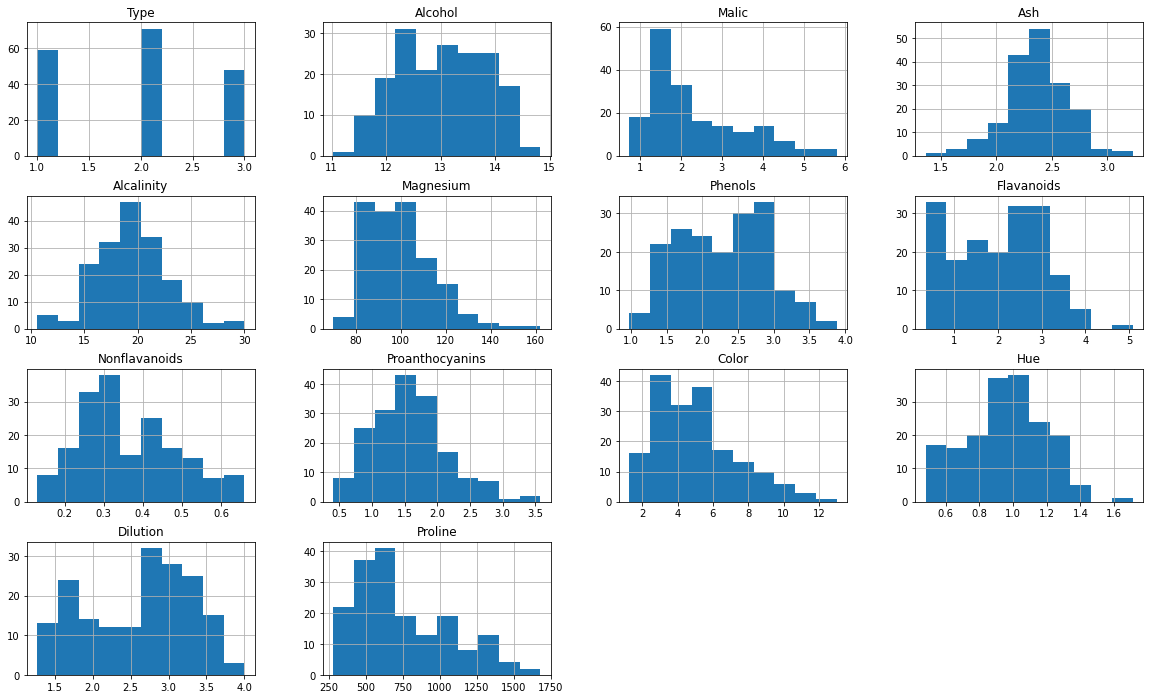

In [18]:
fig=plt.figure(figsize=(20,12))
ax=fig.gca()
df.hist(ax=ax)
plt.show

### BIVARIATE ANALYSIS

C:\Users\lenny\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


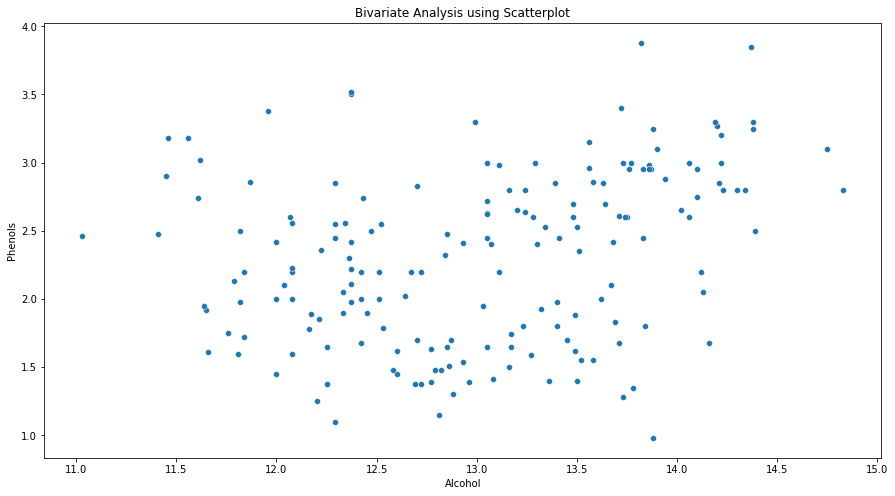

In [19]:
plt.figure(figsize=(15,8))
sns.scatterplot(df.Alcohol,df['Phenols'])
plt.title("Bivariate Analysis using Scatterplot")
plt.show()

Plotting boxplots of each variable.

C:\Users\lenny\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Alcohol'>

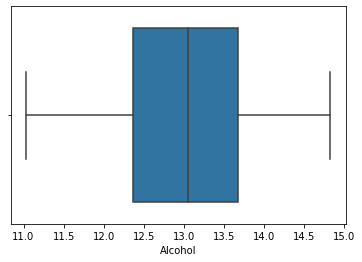

In [20]:
sns.boxplot(df["Alcohol"])

C:\Users\lenny\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Malic'>

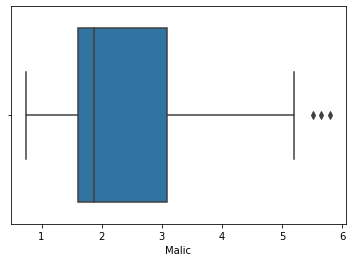

In [21]:
sns.boxplot(df['Malic'])

C:\Users\lenny\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Ash'>

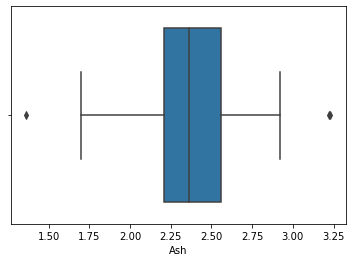

In [22]:
sns.boxplot(df['Ash'])

C:\Users\lenny\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Alcalinity'>

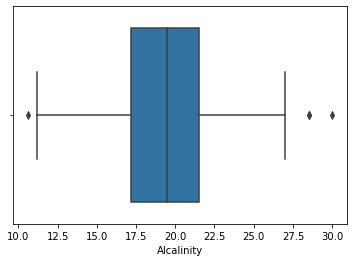

In [23]:
sns.boxplot(df['Alcalinity'])

C:\Users\lenny\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Magnesium'>

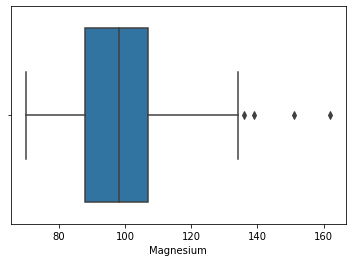

In [24]:
sns.boxplot(df['Magnesium'])

C:\Users\lenny\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Phenols'>

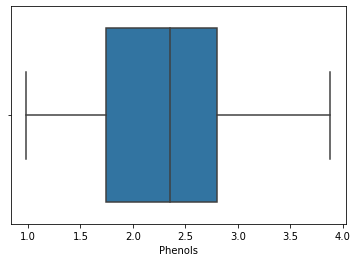

In [25]:
sns.boxplot(df['Phenols'])

C:\Users\lenny\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Flavanoids'>

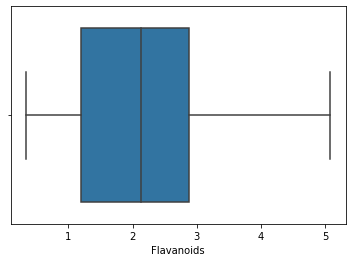

In [26]:
sns.boxplot(df['Flavanoids'])

C:\Users\lenny\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Nonflavanoids'>

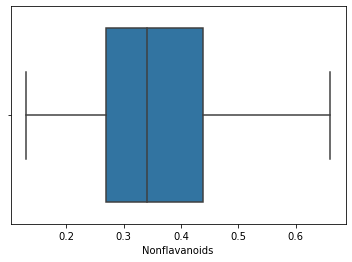

In [27]:
sns.boxplot(df['Nonflavanoids'])

C:\Users\lenny\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Proanthocyanins'>

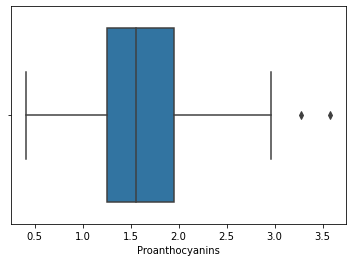

In [28]:
sns.boxplot(df['Proanthocyanins'])

C:\Users\lenny\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Color'>

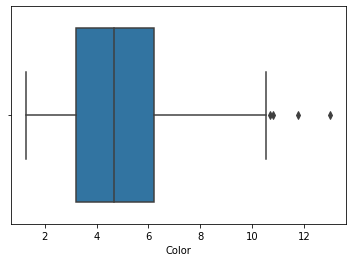

In [29]:
sns.boxplot(df['Color'])

C:\Users\lenny\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Hue'>

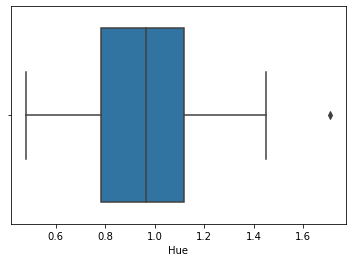

In [30]:
sns.boxplot(df['Hue'])

C:\Users\lenny\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Dilution'>

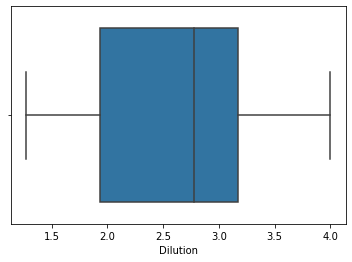

In [31]:
sns.boxplot(df['Dilution'])

C:\Users\lenny\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Proline'>

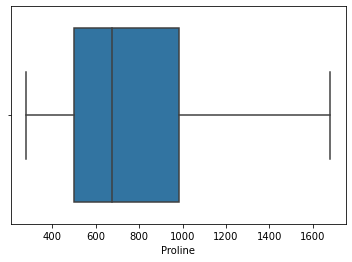

In [32]:
sns.boxplot(df['Proline'])

From the boxplots it is very evident that there are outliers in the dataset so using the below custom function calculated the number of outliers in each variable.

In [33]:
#Defining a custom function to get the number of outliers present as doing the steps again would just add extra lines 
def outlier_func(i):
    x=i.quantile(0.25)-((i.quantile(0.75)-i.quantile(0.25))*1.5)
    y=i.quantile(0.75)+((i.quantile(0.75)-i.quantile(0.25))*1.5)
    outliers= np.where(i > y, True, np.where(i < x, True, False))
    return(outliers)

In [34]:
sum(outlier_func(df["Malic"]))

3

In [35]:
sum(outlier_func(df["Ash"]))

3

In [36]:
sum(outlier_func(df["Alcalinity"]))

4

In [37]:
sum(outlier_func(df["Magnesium"]))

4

In [38]:
sum(outlier_func(df["Proanthocyanins"]))

2

In [39]:
sum(outlier_func(df["Color"]))

4

In [40]:
sum(outlier_func(df["Hue"]))

1

Using winsorization to rectify the outliers to avoid data lose.The module used for Winsorization is feature_engine

In [41]:
winsor=Winsorizer( capping_method='iqr',
                 tail='both',
                 fold=1.5,
                 variables=['Malic'])
df['Malic']=winsor.fit_transform(df[['Malic']])
sum(outlier_func(df['Malic']))

0

In [42]:
winsor=Winsorizer(capping_method='iqr',
                 tail='both',
                 fold=1.5,
                 variables=['Ash'])
df['Ash']=winsor.fit_transform(df[['Ash']])
sum(outlier_func(df['Ash']))

0

In [43]:
winsor=Winsorizer(capping_method='iqr',
                 tail='both',
                 fold=1.5,
                 variables=['Alcalinity'])
df['Alcalinity']=winsor.fit_transform(df[['Alcalinity']])
sum(outlier_func(df['Alcalinity']))

0

In [44]:
from feature_engine.outliers import Winsorizer
winsor=Winsorizer(capping_method='iqr',
                 tail='both',
                 fold=1.5,
                 variables=['Magnesium'])
df['Magnesium']=winsor.fit_transform(df[['Magnesium']])
sum(outlier_func(df['Magnesium']))

0

In [45]:
winsor=Winsorizer(capping_method='iqr',
                 tail='both',
                 fold=1.5,
                 variables=['Proanthocyanins'])
df['Proanthocyanins']=winsor.fit_transform(df[['Proanthocyanins']])
sum(outlier_func(df['Proanthocyanins']))

0

In [46]:
winsor=Winsorizer(capping_method='iqr',
                 tail='both',
                 fold=1.5,
                 variables=['Color'])
df['Color']=winsor.fit_transform(df[['Color']])
sum(outlier_func(df['Color']))

0

In [47]:
winsor=Winsorizer(capping_method='iqr',
                 tail='both',
                 fold=1.5,
                 variables=['Hue'])
df['Hue']=winsor.fit_transform(df[['Hue']])
sum(outlier_func(df['Hue']))

0

Again plotting boxplots to show the difference in the boxplots after rectifying the outliers.

C:\Users\lenny\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Malic'>

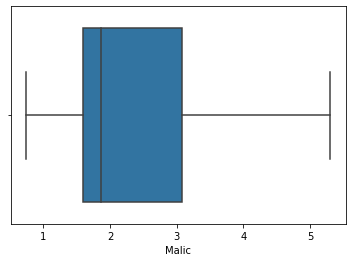

In [48]:
sns.boxplot(df['Malic'])

C:\Users\lenny\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Ash'>

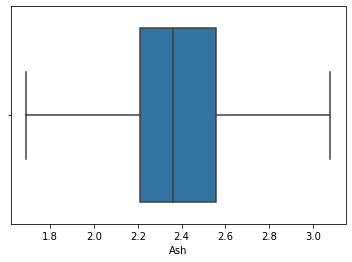

In [49]:
sns.boxplot(df['Ash'])

C:\Users\lenny\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Alcalinity'>

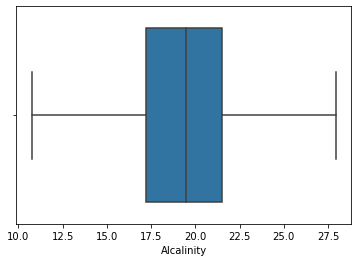

In [50]:
sns.boxplot(df['Alcalinity'])

C:\Users\lenny\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Magnesium'>

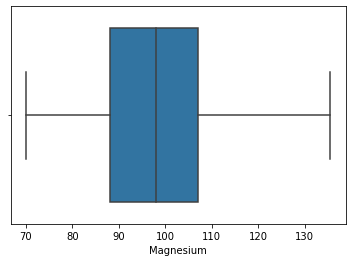

In [51]:
sns.boxplot(df['Magnesium'])

C:\Users\lenny\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Proanthocyanins'>

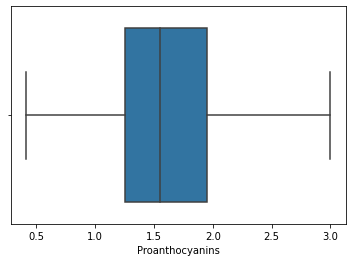

In [52]:
sns.boxplot(df['Proanthocyanins'])

C:\Users\lenny\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Color'>

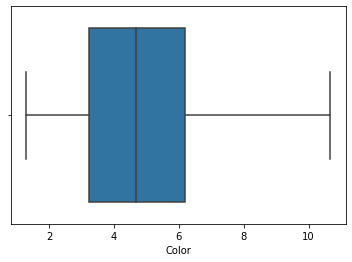

In [53]:
sns.boxplot(df.Color)

C:\Users\lenny\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Hue'>

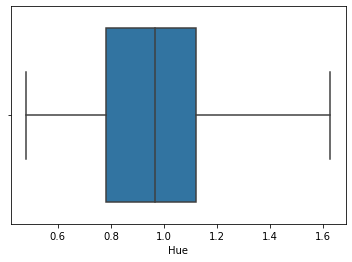

In [54]:
sns.boxplot(df['Hue'])

## NORMALIZATION
Before clustering the data is scaled using normalization 

Using the MinMaxScaler from sklearn.preprocessing library we do normalization and from the descriptive statistics we can see that the values are between 0 and 1.

In [55]:
from sklearn.preprocessing import MinMaxScaler
minmax=MinMaxScaler()
df_minmax=pd.DataFrame(minmax.fit_transform(df),columns=df.columns,index=df.index)
df_minmax.head(3)

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,0.0,0.842105,0.212603,0.533273,0.281977,0.870229,0.627586,0.573840,0.283019,0.725869,0.464324,0.488550,0.970696,0.561341
1,0.0,0.571053,0.227945,0.324640,0.026163,0.458015,0.575862,0.510549,0.245283,0.335907,0.330138,0.497274,0.780220,0.550642
2,0.0,0.560526,0.355068,0.705935,0.456395,0.473282,0.627586,0.611814,0.320755,0.926641,0.468584,0.479826,0.695971,0.646933


In [56]:
df_minmax.describe()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,0.469101,0.518584,0.348589,0.487749,0.507447,0.450124,0.453487,0.356386,0.437460,0.454080,0.400229,0.416121,0.491460,0.334446
std,0.387517,0.213639,0.241134,0.189716,0.191149,0.204797,0.215811,0.210730,0.234818,0.215503,0.240775,0.198120,0.260070,0.224613
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.350658,0.189041,0.375000,0.375000,0.274809,0.262931,0.182489,0.264151,0.324324,0.206603,0.263904,0.244505,0.158702
50%,0.500000,0.531579,0.246575,0.482914,0.508721,0.427481,0.474138,0.378692,0.396226,0.442085,0.363152,0.423119,0.553114,0.282097
75%,1.000000,0.696711,0.513425,0.625000,0.625000,0.564885,0.627586,0.534810,0.580189,0.594595,0.523962,0.558342,0.695971,0.504280
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### DIMENSION REDUCTION USING PCA
In the belown cell the dataset is dimension reduced and the cummulative variance is also shown to get an idea about the percentage of data is retained.

In [66]:
from sklearn.decomposition import PCA
pca=PCA(n_components=3)
pca_values=pca.fit_transform(df_minmax)
var=pca.explained_variance_ratio_
var1=np.cumsum(np.round(var,decimals=4)*100)
var1

array([47.33, 63.54, 70.89])

Text(0, 0.5, 'Percentage of Data')

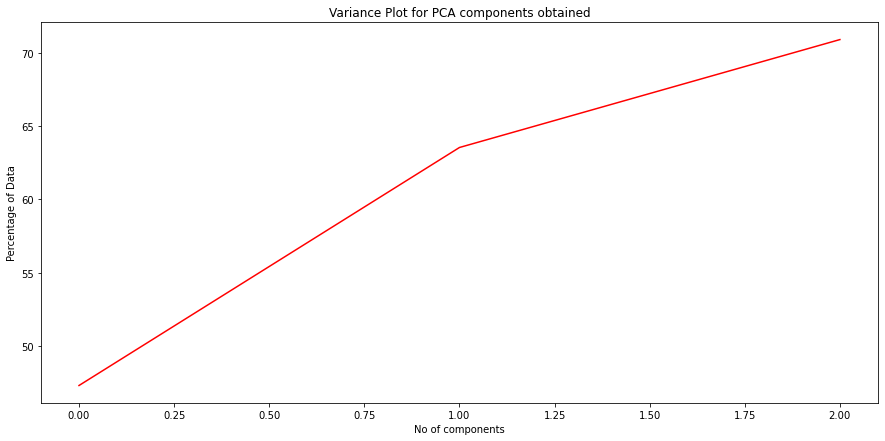

In [67]:
plt.figure(figsize=(15,7))
plt.plot(var1,color='red')
plt.title('Variance Plot for PCA components obtained')
plt.xlabel('No of components')
plt.ylabel('Percentage of Data')

In [68]:
df_pca=pd.DataFrame(pca_values)
df_pca.head(3)

,0,1,2
0,-0.878928,-0.319036,0.020236
1,-0.681397,0.027733,-0.370165
2,-0.721225,-0.235640,0.236216


## USING HIERARCHICAL CLUSTERING WITHOUT USING PCA

## DENDROGRAM
Using the dendrogram to decide which clustering method to use.

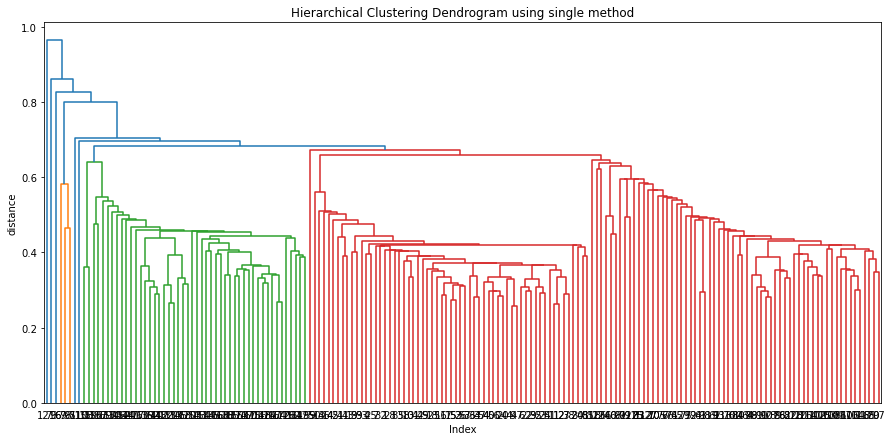

In [57]:
from scipy.cluster.hierarchy import linkage
import scipy.cluster.hierarchy as sch
z=linkage(df_minmax,metric='euclidean',method='single')
plt.figure(figsize=(15,7));plt.title('Hierarchical Clustering Dendrogram using single method');plt.xlabel('Index');plt.ylabel('distance')
sch.dendrogram(z,
              leaf_rotation=0,
              leaf_font_size=10
              )
plt.show()

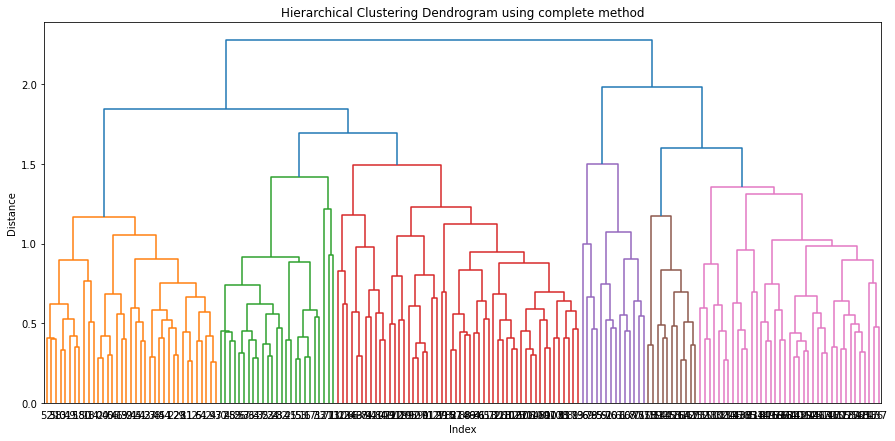

In [58]:
z=linkage(df_minmax,method='complete',metric='euclidean')
plt.figure(figsize=(15,7));plt.title('Hierarchical Clustering Dendrogram using complete method');plt.xlabel('Index');plt.ylabel('Distance')
sch.dendrogram(z,
              leaf_rotation=0,
              leaf_font_size=10
              )
plt.show()

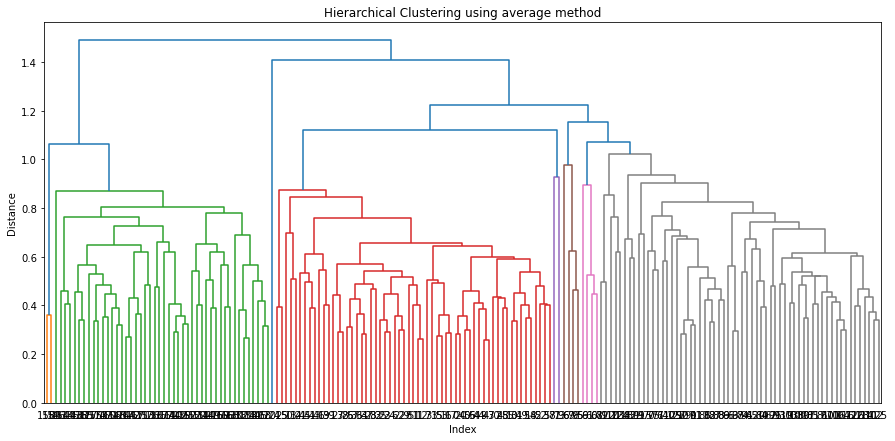

In [59]:
z=linkage(df_minmax,method='average',metric='euclidean')
plt.figure(figsize=(15,7));plt.title('Hierarchical Clustering using average method');plt.xlabel('Index');plt.ylabel('Distance')
sch.dendrogram(z,
              leaf_rotation=0,
              leaf_font_size=10
              )
plt.show()

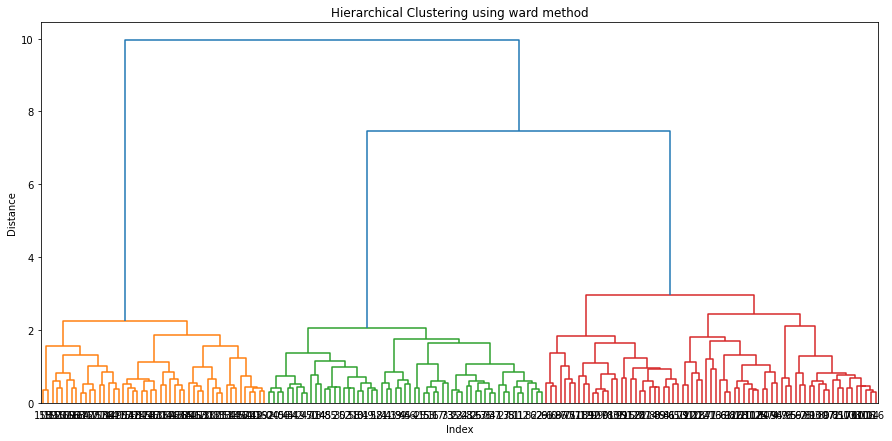

In [60]:
z=linkage(df_minmax,method='ward',metric='euclidean')
plt.figure(figsize=(15,7));plt.title('Hierarchical Clustering using ward method');plt.xlabel('Index');plt.ylabel('Distance')
sch.dendrogram(z,
              leaf_rotation=0,
              leaf_font_size=10
              )
plt.show()

From the dendrograms ward method seems to be the best method to carry out hierarchical clustering and 3 clusters will be best suited as clearly seen in the ward dendrogram.

### NO OF CLUSTERS:3

In [61]:
from sklearn.cluster import AgglomerativeClustering
df_ward3=AgglomerativeClustering(n_clusters=3,linkage='ward',affinity='euclidean').fit(df_minmax)
clust_ward3=pd.Series(df_ward3.labels_)
dfward=df.copy()
dfward['clust']=clust_ward3
dfward.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,clust
0,1,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,2
1,1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,2
2,1,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,2
3,1,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,2
4,1,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,2


In [62]:
dfward.groupby(dfward.clust).mean()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
clust,,,,,,,,,,,,,,
0,2.0,12.278732,1.925669,2.247289,20.195775,93.901408,2.258873,2.080845,0.363662,1.618169,3.086620,1.055102,2.785352,519.507042
1,3.0,13.153750,3.322188,2.437083,21.416667,99.312500,1.678750,0.781458,0.447500,1.153542,7.322292,0.682708,1.683542,629.895833
2,1.0,13.744746,2.010678,2.453199,17.037288,106.338983,2.840169,2.982373,0.290000,1.899322,5.528305,1.062034,3.157797,1115.711864


In [63]:
dfward.groupby(dfward.clust).count()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
clust,,,,,,,,,,,,,,
0,71,71,71,71,71,71,71,71,71,71,71,71,71,71
1,48,48,48,48,48,48,48,48,48,48,48,48,48,48
2,59,59,59,59,59,59,59,59,59,59,59,59,59,59


Text(0, 0.5, 'Alcohol')

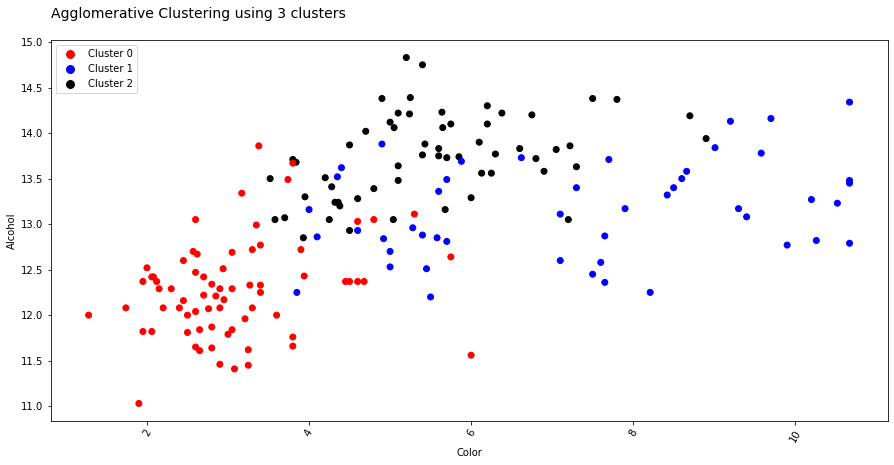

In [82]:
plt.figure(figsize=(15,7))
a=dfward.clust.map({0:'red',1:'blue',2:'black'})
plt.scatter(dfward.Color,dfward.Alcohol,c=a)
from matplotlib.lines import Line2D
colors=['red','blue','black']
legend_elements=[Line2D([0],[0],marker='o',color='w',label='Cluster {}'.format(i),
                       markerfacecolor=mcolor,markersize=10) for i , mcolor in enumerate(colors)]
plt.legend(handles=legend_elements,loc='upper left')
plt.title('Agglomerative Clustering using 3 clusters\n', loc='left', fontsize=14)
plt.xticks(rotation=60)
plt.xlabel('Color')
plt.ylabel('Alcohol')

* Cluster 0 : In this group the Alcohol level in the wine is comparatively lower but the alcalinity and non flavanoid levels are in the middle level
* Cluster 1 : In this group the Alcohol level in the wine is comparatively middle level but the alcalinity and non flavanoid levels are high.
* Cluster 2 : In this group the Alcohol level in the wine is higher but the alcalinity and non flavanoid levels are low.

## HIERARCHICAL CLUSTERING USING PCA

### DENDROGRAM
Using the dendrogram to get an idea about the method to use for clustering.

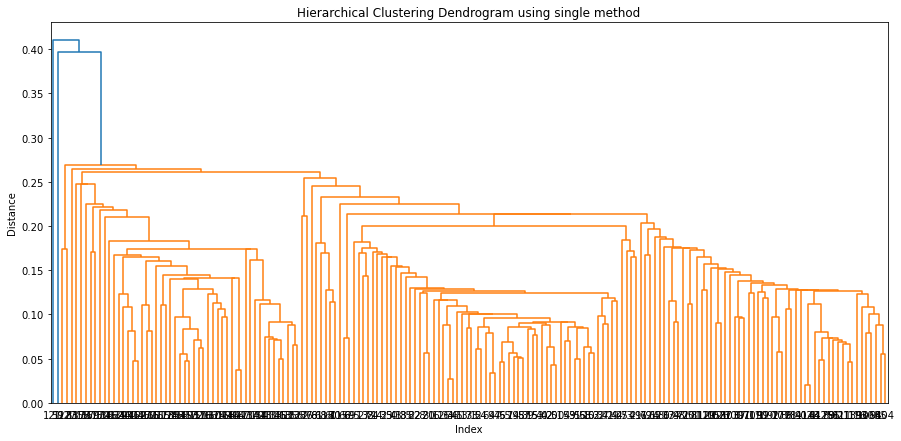

In [69]:
z=linkage(df_pca,method='single',metric='euclidean')
plt.figure(figsize=(15,7));plt.title("Hierarchical Clustering Dendrogram using single method");plt.xlabel('Index');plt.ylabel('Distance')
sch.dendrogram(z,
              leaf_rotation=0,
              leaf_font_size=10
              )
plt.show()

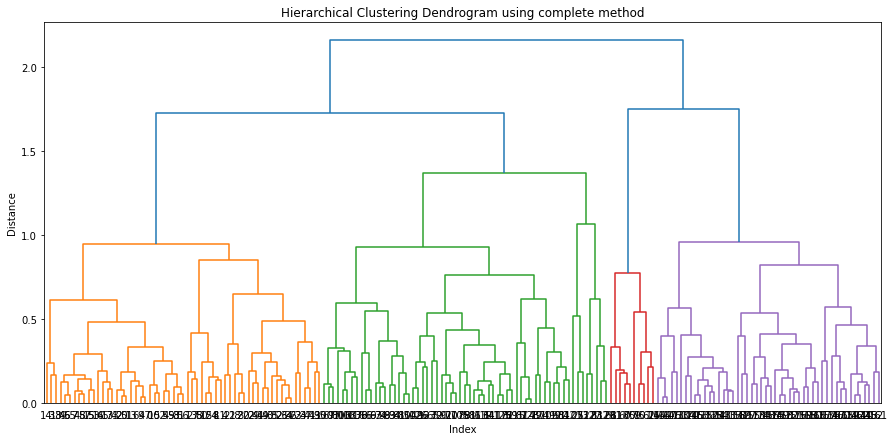

In [70]:
z=linkage(df_pca,method='complete',metric='euclidean')
plt.figure(figsize=(15,7));plt.title('Hierarchical Clustering Dendrogram using complete method');plt.xlabel('Index');plt.ylabel('Distance')
sch.dendrogram(z,
              leaf_rotation=0,
              leaf_font_size=10
              )
plt.show()

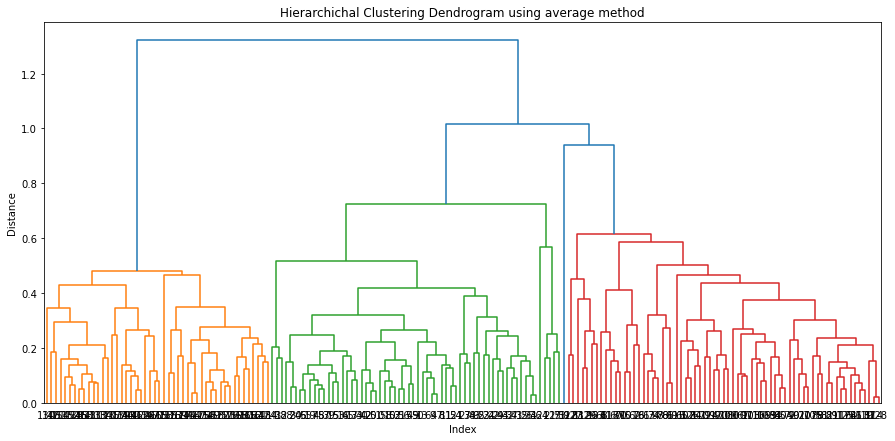

In [71]:
z=linkage(df_pca,method='average',metric='euclidean')
plt.figure(figsize=(15,7));plt.title("Hierarchichal Clustering Dendrogram using average method");plt.xlabel('Index');plt.ylabel('Distance')
sch.dendrogram(z,
              leaf_rotation=0,
              leaf_font_size=10
              )
plt.show()

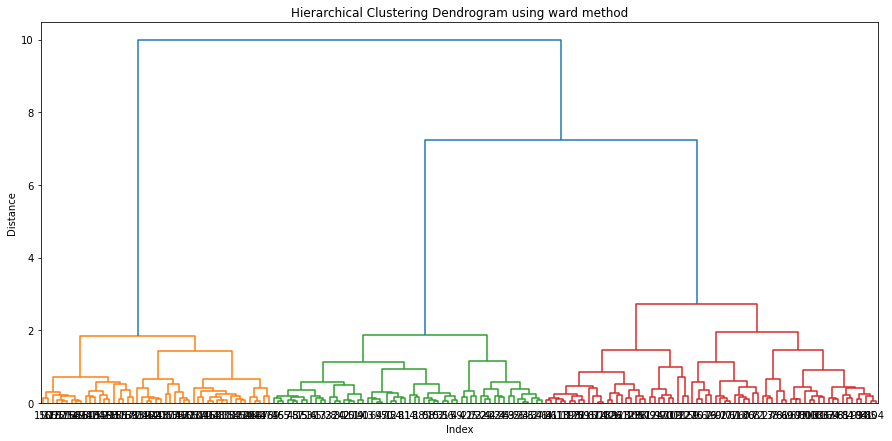

In [72]:
z=linkage(df_pca,method='ward',metric='euclidean')
plt.figure(figsize=(15,7));plt.title("Hierarchical Clustering Dendrogram using ward method");plt.xlabel('Index');plt.ylabel('Distance')
sch.dendrogram(z,
              leaf_rotation=0,
              leaf_font_size=10
              )
plt.show()

from the dendrograms it is very evident that the ward method is better and the optimum number of clusters is 3.

### NO OF CLUSTERS : 3

In [74]:
df_pca3=AgglomerativeClustering(n_clusters=3,linkage='ward',affinity='euclidean').fit(df_pca)
clust_pca=pd.Series(df_pca3.labels_)
df_pca3=df.copy()
df_pca3['clust']=clust_pca
df_pca3.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,clust
0,1,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,2
1,1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0
2,1,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,2
3,1,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,2
4,1,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,2


In [75]:
df_pca3.groupby(df_pca3.clust).mean()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
clust,,,,,,,,,,,,,,
0,1.957746,12.293662,1.896796,2.236866,19.833099,93.000000,2.258873,2.092676,0.359014,1.581831,3.104648,1.054257,2.795493,532.436620
1,2.979592,13.151633,3.333163,2.434694,21.438776,99.020408,1.678163,0.797959,0.450816,1.163061,7.270816,0.685918,1.690204,627.551020
2,1.034483,13.738448,2.014138,2.468254,17.387069,107.810345,2.860690,2.991897,0.290172,1.948621,5.518793,1.066897,3.165172,1110.241379


In [76]:
df_pca3.groupby(df_pca3.clust).count()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
clust,,,,,,,,,,,,,,
0,71,71,71,71,71,71,71,71,71,71,71,71,71,71
1,49,49,49,49,49,49,49,49,49,49,49,49,49,49
2,58,58,58,58,58,58,58,58,58,58,58,58,58,58


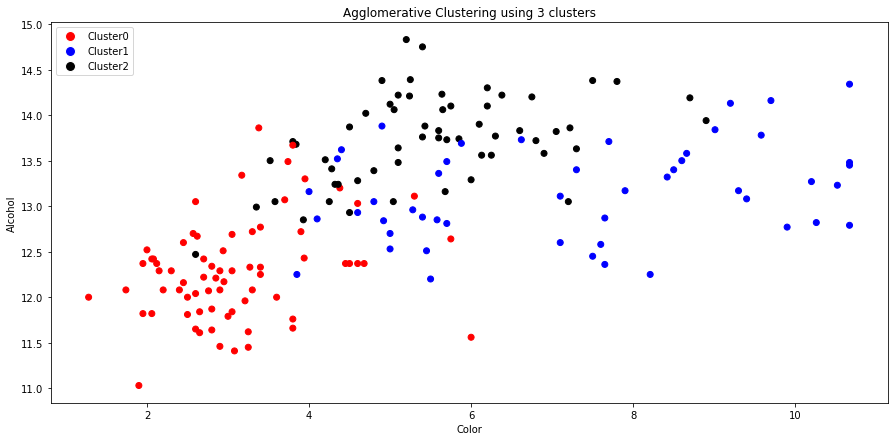

In [81]:
plt.figure(figsize=(15,7))
a=df_pca3.clust.map({0:'red',1:'blue',2:'black'})
plt.scatter(df_pca3.Color,df_pca3.Alcohol,c=a)
from matplotlib.lines import Line2D
colors=['red','blue','black']
legend_elements=[Line2D([0],[0],marker='o',color='w',label='Cluster{}'.format(i),
                markerfacecolor=mcolor,markersize=10) for i, mcolor in enumerate (colors)]
plt.legend(handles=legend_elements,loc='upper left')
plt.title("Agglomerative Clustering using 3 clusters")
plt.xlabel('Color')
plt.ylabel('Alcohol')
plt.show()

* Cluster 0 : In this group the Alcohol level in the wine is comparatively lower but the alcalinity and non flavanoid levels are in the middle level
* Cluster 1 : In this group the Alcohol level in the wine is comparatively middle level but the alcalinity and non flavanoid levels are high.
* Cluster 2 : In this group the Alcohol level in the wine is higher but the alcalinity and non flavanoid levels are low.

## USING KMEANS CLUSTERING WITHOUT USING PCA

### SCREE PLOT

In [83]:
from sklearn.cluster import KMeans
TWSS=[]
k=list(range(2,9))
for i in k:
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(df_minmax)
    TWSS.append(kmeans.inertia_)
TWSS

[87.26608015651163,
 59.745078749328854,
 54.81704779504551,
 51.99960624118554,
 49.15614840843439,
 47.18964800123659,
 44.8532527943697]

Text(0, 0.5, 'Total within SS')

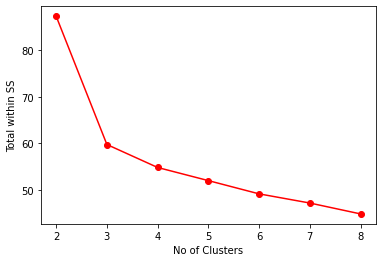

In [84]:
plt.plot(k,TWSS,'ro-');plt.xlabel('No of Clusters');plt.ylabel('Total within SS')

from the scree plot 3 clusters seem to be the most optimum number of clusters.

### NO OF CLUSTERS : 3

In [85]:
model=KMeans(n_clusters=3)
model.fit(df_minmax)
model.labels_
mb=pd.Series(model.labels_)
df_k3=df.copy()
df_k3['clust']=mb
df_k3.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,clust
0,1,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,2
1,1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,2
2,1,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,2
3,1,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,2
4,1,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,2


In [86]:
df_k3.groupby(df_k3.clust).mean()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
clust,,,,,,,,,,,,,,
0,2.000000,12.257246,1.901341,2.241123,20.050000,93.427536,2.252609,2.076232,0.362319,1.613188,3.057971,1.054525,2.786232,512.826087
1,2.979592,13.151633,3.333163,2.434694,21.438776,99.020408,1.678163,0.797959,0.450816,1.163061,7.270816,0.685918,1.690204,627.551020
2,1.016667,13.732167,2.005000,2.455646,17.219167,106.825000,2.847833,2.980833,0.288667,1.900333,5.492000,1.066167,3.163500,1113.533333


In [87]:
df_k3.groupby(df_k3.clust).count()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
clust,,,,,,,,,,,,,,
0,69,69,69,69,69,69,69,69,69,69,69,69,69,69
1,49,49,49,49,49,49,49,49,49,49,49,49,49,49
2,60,60,60,60,60,60,60,60,60,60,60,60,60,60


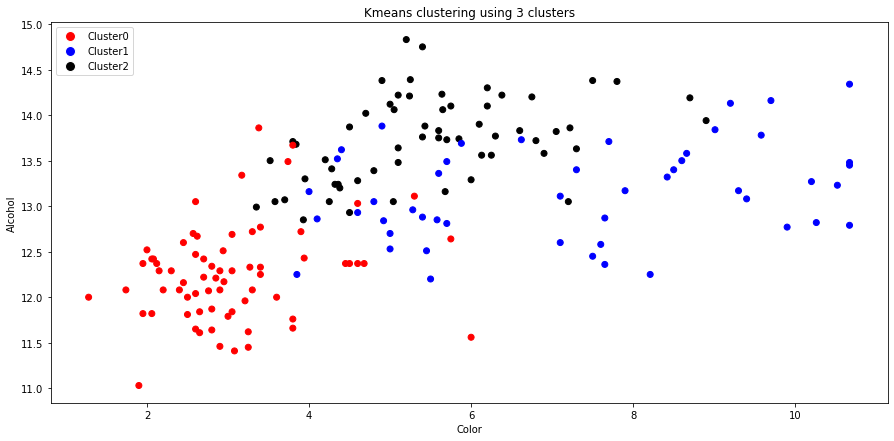

In [89]:
plt.figure(figsize=(15,7))
a=df_k3.clust.map({0:'red',1:'blue',2:'black'})
plt.scatter(df_k3.Color,df_k3.Alcohol,c=a)
from matplotlib.lines import Line2D
colors=['red','blue','black']
legend_elements=[Line2D([0],[0],marker='o',color='w',label='Cluster{}'.format(i),
                       markerfacecolor=mcolor,markersize=10) for i ,mcolor in enumerate (colors)]
plt.legend(handles=legend_elements,loc='upper left')
plt.title("Kmeans clustering using 3 clusters")
plt.xlabel('Color')
plt.ylabel('Alcohol')
plt.show()

* Cluster 0 : In this group the Alcohol level in the wine is comparatively lower but the alcalinity and non flavanoid levels are in the middle level
* Cluster 1 : In this group the Alcohol level in the wine is comparatively middle level but the alcalinity and non flavanoid levels are high.
* Cluster 2 : In this group the Alcohol level in the wine is higher but the alcalinity and non flavanoid levels are low.

## USING KMEANS CLUSTERING  USING PCA

### SCREE PLOT

In [90]:
from sklearn.cluster import KMeans
TWSS=[]
for i in list(range(2,9)):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(df_pca)
    TWSS.append(kmeans.inertia_)
TWSS

[47.241619905496556,
 20.323634287217892,
 16.856068181854994,
 14.869644813856743,
 13.08314915990947,
 11.587952523791666,
 10.577188860326912]

Text(0, 0.5, 'Total within SS')

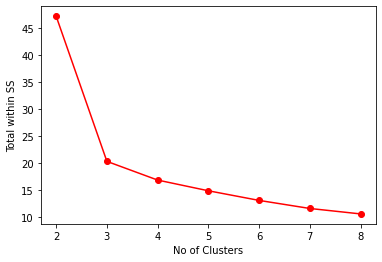

In [91]:
plt.plot(k,TWSS,'ro-');plt.xlabel("No of Clusters");plt.ylabel('Total within SS')

From the scree plot 3 number of clusters seem to be the most optimum number for kmeans clustering.

### NO OF CLUSTERS : 3

In [92]:
model=KMeans(n_clusters=3)
model.fit(df_pca)
mb=pd.Series(model.labels_)
df_pk=df.copy()
df_pk['clust']=mb
df_pk.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,clust
0,1,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0
1,1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0
2,1,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0
3,1,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0
4,1,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0


In [93]:
df_pk.groupby(df_pk.clust).mean()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
clust,,,,,,,,,,,,,,
0,1.016667,13.732167,2.005000,2.455646,17.219167,106.825000,2.847833,2.980833,0.288667,1.900333,5.492000,1.066167,3.163500,1113.533333
1,2.979592,13.151633,3.333163,2.434694,21.438776,99.020408,1.678163,0.797959,0.450816,1.163061,7.270816,0.685918,1.690204,627.551020
2,2.000000,12.257246,1.901341,2.241123,20.050000,93.427536,2.252609,2.076232,0.362319,1.613188,3.057971,1.054525,2.786232,512.826087


In [94]:
df_pk.groupby(df_pk.clust).count()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
clust,,,,,,,,,,,,,,
0,60,60,60,60,60,60,60,60,60,60,60,60,60,60
1,49,49,49,49,49,49,49,49,49,49,49,49,49,49
2,69,69,69,69,69,69,69,69,69,69,69,69,69,69


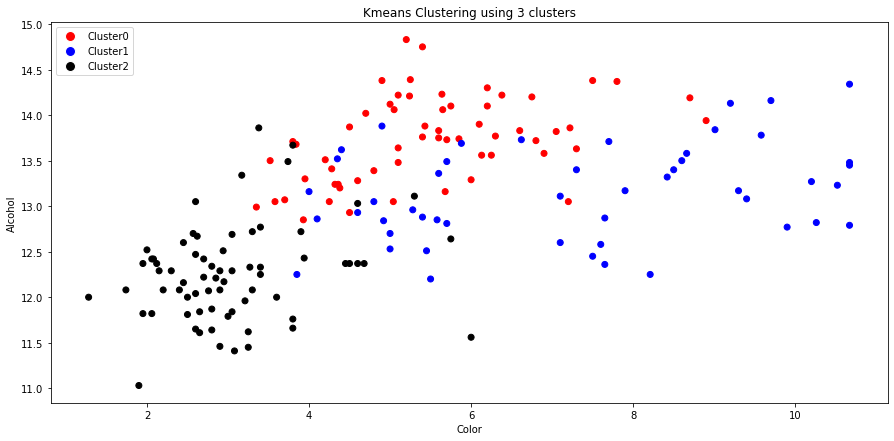

In [95]:
plt.figure(figsize=(15,7))
a=df_pk.clust.map({0:'red',1:'blue',2:'black'})
plt.scatter(df_pk.Color,df_pk.Alcohol,c=a)
from matplotlib.lines import Line2D
colors=['red','blue','black']
legend_elements=[Line2D([0],[0],marker='o',color='w',label='Cluster{}'.format(i),
                       markerfacecolor=mcolor,markersize=10) for i , mcolor in enumerate (colors)]
plt.legend(handles=legend_elements,loc='upper left')
plt.title("Kmeans Clustering using 3 clusters")
plt.xlabel('Color')
plt.ylabel('Alcohol')
plt.show()

* Cluster 0 : In this group the Alcohol level in the wine is higher but the alcalinity and non flavanoid levels are low.
* Cluster 1 : In this group the Alcohol level in the wine is comparatively middle level but the alcalinity and non flavanoid levels are high.
* Cluster 2 : In this group the Alcohol level in the wine is comparatively lower but the alcalinity and non flavanoid levels are in the middle level

## CONCLUSION
From the above insights we can get the following inferences.

* The results obtained after dimension reduction and the results obtained before dimension reduction using both Hierarchical clustering and Kmeans clustering where the same.

__So from the above points we can infer that dimension reduction doesn't change the final output alot even though the data used is reduced which helps to reduce the computation time  without  compromising on the accuracy.__

As for the dataset, we can group them into three groups: 

* __Type 'A' Wine__ : This wine contains low alcalinity and non flavanoid levels but the alcohol level is high.

* __Type 'B' Wine__ : This wine contains middle level  alcalinity and non flavanoid levels but the alcohol level is low.

* __Type 'C' Wine__ : This wine contains high alcalinity and non flavanoid levels but the alcohol level is middle level.

### BENEFIT
* From the above analysis of the wines the clusters were able to cluster the wines into almost the correct type of wines using the influencing factors.
* Alcalinity and non flavanoid levels were the influencing factors. 